In [136]:
from itertools import cycle

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [137]:
%matplotlib inline
plt.style.use('seaborn')
plt.rc('figure', figsize=(10, 10))

#### Accuracy

In [138]:
ε = [1e-4, 1e-5, 1e-6]

### Additional functions and variables

In [90]:
X = np.linspace(-10, 10, 1000)
DEFAULT_PARAMS = ([-10, 10], [0, 0], 'darkgray') # parameters to plot the y = 0 function

def get_separeted_roots(f, a, b, n):
    """Returns the intervals at the ends of which 
    the function has different signs
    """
    sep_roots = []
    roots = [(x, f(x)) for x in np.linspace(a, b, n)]
    temp = roots[0]
    for key, value in roots[1:]:
        if(temp[1]*value < 0):
            sep_roots.append((temp[0], key))
        temp = key, value
    return sep_roots

def print_results(f, *args, maxiter=100, ar=None):
    """Print a pretty form of the functions result"""
    for e in ε:
        res = f(*args, tol=e, maxiter=maxiter)
        print(f"ε = {e}; ", end="")
        if isinstance(res, list) or isinstance(res, tuple):
            print(f"x = {res[1]}; iterations = {res[0]}")
        else:
            print(f"x = {res}")
    if ar:
        print(f"Analytical root = {ar}", end="\n\n")        

# Task 1
## Function f(x)
### $f(x) = {tg^2(x) - (1 + \frac{1}{\sqrt{3}})tg(x) + \frac{1}{\sqrt{3}}}$ Segment: [0, 1]

In [5]:
def f(x): 
    return np.tan(x)**2 - (1 + 1/np.sqrt(3))*np.tan(x) + 1/np.sqrt(3)

def df(x):
    """First derivative of the function f(x)"""
    return (2*np.tan(x) - (1 + 1/np.sqrt(3))) / np.cos(x)**2

def d2f(x):
    """Second derivative of the funtion f(x)"""
    return (2 + (2*np.tan(x) - 1 - 1/np.sqrt(3))*np.sin(2*x)) / np.cos(x)**4

### Analytical roots in a segment [0, 1]

In [139]:
A, B = 0, 1
ROOTS_F = np.pi/6, np.pi/4
fcyc = cycle(ROOTS_F).__next__
ROOTS_F

(0.5235987755982988, 0.7853981633974483)

### Graph of the function

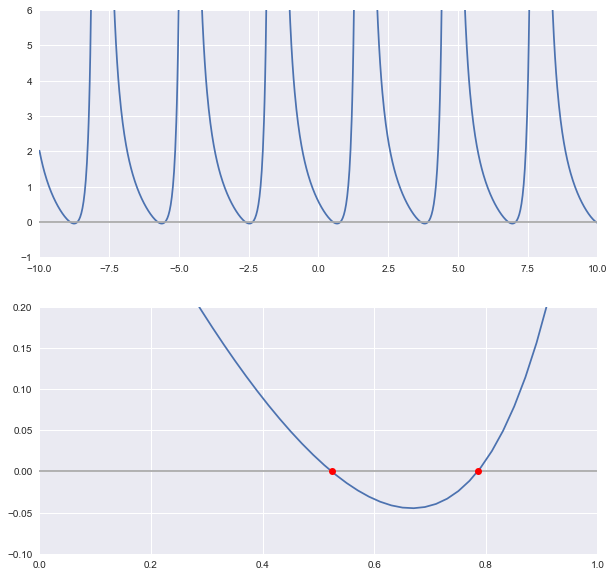

In [140]:
y = f(X)

figure, ax = plt.subplots(2, 1)

ax[0].plot(X, y)
ax[0].plot(*DEFAULT_PARAMS)

ax[1].plot(X, y)
ax[1].plot(*DEFAULT_PARAMS)
ax[1].plot(ROOTS_F, f(ROOTS_F), 'ro')

ax[0].set_xlim(-10, 10)
ax[0].set_ylim(-1, 6)

ax[1].set_xlim(A, B)
ax[1].set_ylim(-0.1, 0.2)

plt.show()

## Roots separation

In [8]:
N = 10 # number of nodes

In [9]:
{x: f(x) for x in np.linspace(A, B, N)}

{0.0: 0.57735026918962584,
 0.1111111111111111: 0.41381231433755339,
 0.22222222222222221: 0.2719969538613029,
 0.33333333333333331: 0.15107866020992872,
 0.44444444444444442: 0.052969116761491741,
 0.55555555555555558: -0.016467842724969928,
 0.66666666666666663: -0.044654841616333818,
 0.77777777777777768: -0.0061641253161496268,
 0.88888888888888884: 0.15170020117180771,
 1.0: 0.54629159628197332}

In [10]:
sep_roots_f = get_separeted_roots(f, A, B, N)
sep_roots_f

[(0.44444444444444442, 0.55555555555555558),
 (0.77777777777777768, 0.88888888888888884)]

### Graph

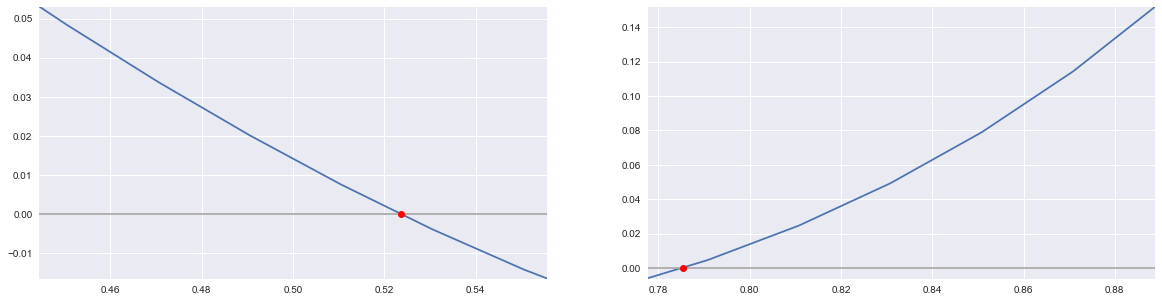

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].plot(X, y)
ax[0].plot(*DEFAULT_PARAMS)
ax[0].plot(ROOTS_F[0], 0, 'ro')

ax[1].plot(X, y)
ax[1].plot(*DEFAULT_PARAMS)
ax[1].plot(ROOTS_F[1], 0, 'ro')

ax[0].set_xlim(*sep_roots_f[0])
ax[0].set_ylim(f(sep_roots_f[0][1]), f(sep_roots_f[0][0]))

ax[1].set_xlim(*sep_roots_f[1])
ax[1].set_ylim(f(sep_roots_f[1][0]), f(sep_roots_f[1][1]))

plt.show()

## Bisection method

In [95]:
def bisection(f, a, b, tol, maxiter=100):  
    """Return the number of iterations 
    and the root of the funtion using scipy.optimize.bisect
    """
    root, result = scipy.optimize.bisect(f, a, b, xtol=tol, maxiter=maxiter, full_output=True)
    return result.iterations, root

def bisect(f, a, b, tol, maxiter=100):
    """Return the root of function using bisection method 
    and number of iterations to achieve given accuracy
    """
    if f(a)*f(b) > 0:
        raise ValueError(
            "Function must have different signs at the ends of the segment")
    m = (a+b) / 2
    for i in range(maxiter):
        if np.abs(b-a) < 2*tol:
            return i, m
        a, b = (m, b) if f(b)*f(m) < 0 else (a, m)
        m = (a+b) / 2
    return maxiter, m

### Number of iterations to achieve accuracy

In [118]:
def get_iter_number_bisect(a, b, tol, maxiter):
    """Return number of iterations 
    in bisection method 
    to achieve given accuracy
    """
    return int(np.log2((b-a) / (2*tol))) + 1

In [119]:
for i, l_r in enumerate(sep_roots_f):
    print(f"Segment {i + 1}")
    print_results(get_iter_number_bisect, l_r[0], l_r[1])

Segment 1
ε = 0.0001; x = 10
ε = 1e-05; x = 13
ε = 1e-06; x = 16
Segment 2
ε = 0.0001; x = 10
ε = 1e-05; x = 13
ε = 1e-06; x = 16


### Roots

#### Scipy.optimize.bisect

In [93]:
for sep_root in sep_roots_f:
    print_results(bisection, f, *sep_root, ar=fcyc())

ε = 0.0001; x = 0.5236002604166666; iterations = 11
ε = 1e-05; x = 0.523593478732639; iterations = 14
ε = 1e-06; x = 0.5235994127061632; iterations = 17
Analytical root = 0.7853981633974483

ε = 0.0001; x = 0.7854275173611109; iterations = 11
ε = 1e-05; x = 0.7853936089409721; iterations = 14
ε = 1e-06; x = 0.7853978474934894; iterations = 17
Analytical root = 0.5235987755982988



#### Personal

In [96]:
for sep_root in sep_roots_f:
    print_results(bisect, f, *sep_root, ar=fcyc())

ε = 0.0001; x = 0.5236002604166666; iterations = 10
ε = 1e-05; x = 0.5235934787326388; iterations = 13
ε = 1e-06; x = 0.5235994127061632; iterations = 16
Analytical root = 0.7853981633974483

ε = 0.0001; x = 0.785427517361111; iterations = 10
ε = 1e-05; x = 0.7853936089409722; iterations = 13
ε = 1e-06; x = 0.7853978474934896; iterations = 16
Analytical root = 0.5235987755982988



## Chord method

In [97]:
def chord(f, a, b, tol, maxiter=100):
    """Return the root of function using chord method 
    and number of iterations to achieve given accuracy
    """
    if f(a)*f(b) > 0:
        raise ValueError(
            "Function must have different signs at the ends of the segment")
    x0 = a
    for i in range(maxiter):        
        x = a - f(a)*(b - a)/(f(b)-f(a))
        if np.abs(x-x0) < tol:
            return i, x
        a, b = (x, b) if f(x)*f(a) > 0 else (a, x)
        x0 = x
    return maxiter, x

### Roots

#### Personal

In [98]:
for sep_root in sep_roots_f:
    print_results(chord, f, *sep_root, ar=fcyc())

ε = 0.0001; x = 0.5236023323459896; iterations = 4
ε = 1e-05; x = 0.5235993371624277; iterations = 5
ε = 1e-06; x = 0.5235988642611344; iterations = 6
Analytical root = 0.7853981633974483

ε = 0.0001; x = 0.7853529771250662; iterations = 5
ε = 1e-05; x = 0.7853947347717255; iterations = 8
ε = 1e-06; x = 0.7853975489468443; iterations = 10
Analytical root = 0.5235987755982988



## Secant method

In [99]:
def secant(f, x0, tol, p1=None, maxiter=100):
    """Return the root of function using secant method 
    and number of iterations to achieve given accuracy
    """
    p0 = float(x0)
    if not p1:
        p1 = x0*(1+1e-4) + (1e-4 if x0 >= 0 else (-1e-4))    
    for i in range(maxiter):
        df = (f(p1)-f(p0)) / (p1-p0)
        p = p1 - f(p1)/df
        if np.abs(p-p1) < tol:
            return i, p
        p0, p1 = p1, p
    return maxiter, p

### Roots

#### Scipy.optimize.newton

In [47]:
for l, _ in sep_roots_f:
    print_results(scipy.optimize.newton, f, l, ar=fcyc())

ε = 0.0001; x = 0.5235986255703748
ε = 1e-05; x = 0.5235987755835607
ε = 1e-06; x = 0.5235987755835607
Analytical root = 0.5235987755982988

ε = 0.0001; x = 0.7853981334717756
ε = 1e-05; x = 0.7853981634000456
ε = 1e-06; x = 0.7853981634000456
Analytical root = 0.7853981633974483



#### Personal

In [100]:
for l, _ in sep_roots_f:
    print_results(secant, f, l, ar=fcyc())

ε = 0.0001; x = 0.5235986255703748; iterations = 3
ε = 1e-05; x = 0.5235987755835607; iterations = 4
ε = 1e-06; x = 0.5235987755835607; iterations = 4
Analytical root = 0.7853981633974483

ε = 0.0001; x = 0.7853981334717756; iterations = 2
ε = 1e-05; x = 0.7853981634000456; iterations = 3
ε = 1e-06; x = 0.7853981634000456; iterations = 3
Analytical root = 0.5235987755982988



## Simplified Newton method

In [84]:
def simplified_newton(f, x0, df0, tol, maxiter=100):
    """Return the root of function using simplified Newton method 
    and number of iterations to achieve given accuracy
    """    
    x = x0 - f(x0)/df0
    for i in range(maxiter):
        if np.abs(x-x0) < tol:
            return i, x
        x0 = x
        x -= f(x)/df0
    return maxiter, x

### Roots

#### Personal

In [101]:
for l, _ in sep_roots_f:
    print_results(simplified_newton, f, l, df(l), ar=fcyc())

ε = 0.0001; x = 0.5235868699604814; iterations = 5
ε = 1e-05; x = 0.5235956218241371; iterations = 6
ε = 1e-06; x = 0.5235985542643643; iterations = 8
Analytical root = 0.7853981633974483

ε = 0.0001; x = 0.7854013227407829; iterations = 2
ε = 1e-05; x = 0.785397867907036; iterations = 3
ε = 1e-06; x = 0.7853981910279898; iterations = 4
Analytical root = 0.5235987755982988



## Newton method

In [55]:
def newton(f, x0, df, tol, maxiter=100):
    """Return the root of function using Newton method 
    and number of iterations to achieve given accuracy
    """    
    x = x0 - f(x0)/df(x0)
    for i in range(maxiter):
        if np.abs(x-x0) < tol:
            return i, x
        x0 = x
        x -= f(x)/df(x)
    return maxiter, p

### Roots

#### Scipy.optimize.newton

In [102]:
for l, _ in sep_roots_f:
    print_results(scipy.optimize.newton, f, l, df, ar=fcyc())

ε = 0.0001; x = 0.5235987755982399
ε = 1e-05; x = 0.5235987755982399
ε = 1e-06; x = 0.5235987755982399
Analytical root = 0.7853981633974483

ε = 0.0001; x = 0.7853981634003812
ε = 1e-05; x = 0.7853981634003812
ε = 1e-06; x = 0.7853981634003812
Analytical root = 0.5235987755982988



#### Personal

In [103]:
for l, r in sep_roots_f:
    print_results(newton, f, l, df, ar=fcyc())

ε = 0.0001; x = 0.5235987755982399; iterations = 3
ε = 1e-05; x = 0.5235987755982399; iterations = 3
ε = 1e-06; x = 0.5235987755982399; iterations = 3
Analytical root = 0.7853981633974483

ε = 0.0001; x = 0.7853981634003812; iterations = 2
ε = 1e-05; x = 0.7853981634003812; iterations = 2
ε = 1e-06; x = 0.7853981634003812; iterations = 2
Analytical root = 0.5235987755982988



## Function g(x)
### $g(x) = {tg^2(x) - 2tg(x) + 1}$ Segment: [0, 1]

In [57]:
def g(x):
    return np.tan(x)**2 - 2*np.tan(x) + 1
    
def dg(x): 
    """First derivative of the function g(x)"""
    return 2 * (np.tan(x)-1) / np.cos(x)**2 

def d2g(x): 
    """Second derivative of the function g(x)"""
    return 2 * (1 + (np.tan(x)-1)*np.sin(2*x)) / np.cos(x)**4

### Analytical roots in a segment [0, 1]

In [142]:
ROOTS_G = np.pi / 4
ROOTS_G

0.7853981633974483

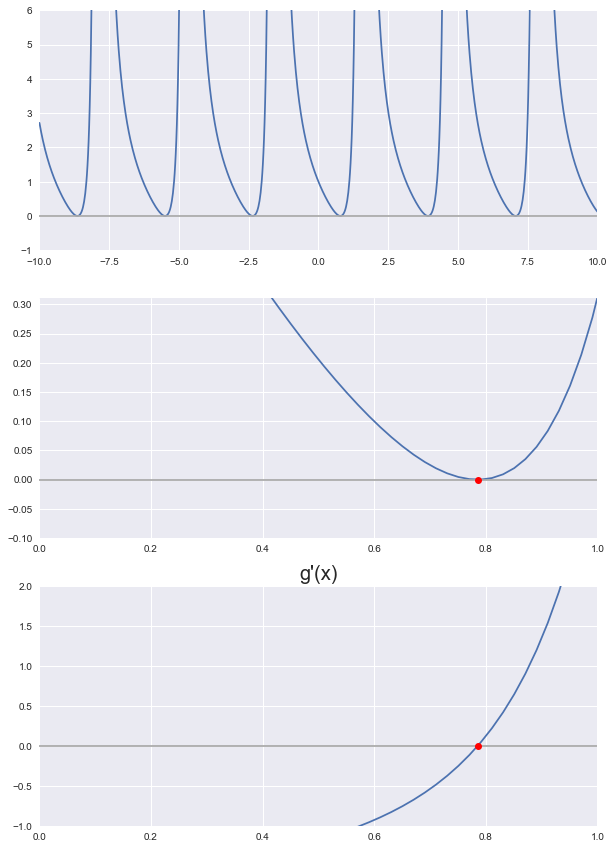

In [143]:
y = g(X)

figure, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].plot(X, y)
ax[0].plot(*DEFAULT_PARAMS)

ax[1].plot(X, y)
ax[1].plot(*DEFAULT_PARAMS)
ax[1].plot(ROOTS_G, g(ROOTS_G), 'ro')

ax[2].plot(X, dg(X))
ax[2].plot(*DEFAULT_PARAMS)
ax[2].plot(ROOTS_G, g(ROOTS_G), 'ro')
ax[2].set_title("g'(x)", fontsize=20)

ax[0].set_xlim(-10, 10)
ax[0].set_ylim(-1, 6)

ax[1].set_xlim(A, B)
ax[1].set_ylim(-0.1, min(g(A), g(B)))

g_der_A = dg(A)
g_der_B = dg(B)

ax[2].set_xlim(A, B)
ax[2].set_ylim(-1, 2)

plt.show()

## Roots separation
#### Function

In [63]:
get_separeted_roots(g, A, B, N)

[]

#### Derivative

In [64]:
sep_roots_g = get_separeted_roots(dg, A, B, N)[0]
sep_roots_g

(0.77777777777777768, 0.88888888888888884)

## Secant method

### Roots
#### Scipy.optimize.newton

In [144]:
print_results(scipy.optimize.newton, g, 0.5, ar=ROOTS_G)

ε = 0.0001; x = 0.7852851032502433
ε = 1e-05; x = 0.7853879708666364
ε = 1e-06; x = 0.7853966763555447
Analytical root = 0.7853981633974483



#### Personal

In [145]:
print_results(secant, g, 0.5, ar=ROOTS_G)

ε = 0.0001; x = 0.7852851032502433; iterations = 14
ε = 1e-05; x = 0.7853879708666364; iterations = 19
ε = 1e-06; x = 0.7853966763555447; iterations = 23
Analytical root = 0.7853981633974483



### Derivative
#### Scipy.optimize.newton

In [146]:
print_results(scipy.optimize.newton, dg, sep_roots_g[0], ar=ROOTS_G)

ε = 0.0001; x = 0.7853981614180707
ε = 1e-05; x = 0.7853981614180707
ε = 1e-06; x = 0.7853981633974711
Analytical root = 0.7853981633974483



#### Personal

In [147]:
print_results(secant, dg, sep_roots_g[0], ar=ROOTS_G)

ε = 0.0001; x = 0.7853981614180707; iterations = 2
ε = 1e-05; x = 0.7853981614180707; iterations = 2
ε = 1e-06; x = 0.7853981633974711; iterations = 3
Analytical root = 0.7853981633974483



## Simplified Newton method

### Roots

#### Personal

In [148]:
print_results(simplified_newton, g, 0.7, dg(0.7), maxiter=500, ar=ROOTS_G)

ε = 0.0001; x = 0.7818796864857117; iterations = 33
ε = 1e-05; x = 0.7842473515706359; iterations = 111
ε = 1e-06; x = 0.7850328267875307; iterations = 362
Analytical root = 0.7853981633974483



### Derivative

#### Personal

In [149]:
print_results(simplified_newton, dg, sep_roots_g[0], d2g(sep_roots_g[0]), ar=ROOTS_G)

ε = 0.0001; x = 0.7853985482260302; iterations = 2
ε = 1e-05; x = 0.7853985482260302; iterations = 2
ε = 1e-06; x = 0.7853981454868495; iterations = 3
Analytical root = 0.7853981633974483



## Newton method

### Roots

#### Scipy.optimize.newton

In [150]:
print_results(scipy.optimize.newton, g, A, dg, ar=ROOTS_G)

ε = 0.0001; x = 0.785309940997616
ε = 1e-05; x = 0.7853926504089188
ε = 1e-06; x = 0.7853974742775366
Analytical root = 0.7853981633974483



#### Personal

In [151]:
print_results(newton, g, sep_roots_g[0], dg, ar=ROOTS_G)

ε = 0.0001; x = 0.785339517451586; iterations = 6
ε = 1e-05; x = 0.7853908334063235; iterations = 9
ε = 1e-06; x = 0.7853972471591223; iterations = 12
Analytical root = 0.7853981633974483



## Methods for the derivative g'(x) that can not be applied to the function g(x)

## Bisection method

### Number of iterations to achieve accuracy

In [120]:
print_results(get_iter_number_bisect, sep_roots_g[0], sep_roots_g[1])

ε = 0.0001; x = 10
ε = 1e-05; x = 13
ε = 1e-06; x = 16


### Roots

#### Scipy.optimize.bisect

In [152]:
print_results(bisection, dg, *sep_roots_g, ar=ROOTS_G)

ε = 0.0001; x = 0.7854275173611109; iterations = 11
ε = 1e-05; x = 0.7853936089409721; iterations = 14
ε = 1e-06; x = 0.7853978474934894; iterations = 17
Analytical root = 0.7853981633974483



#### Personal

In [153]:
print_results(bisect, dg, *sep_roots_g, ar=ROOTS_G)

ε = 0.0001; x = 0.785427517361111; iterations = 10
ε = 1e-05; x = 0.7853936089409722; iterations = 13
ε = 1e-06; x = 0.7853978474934896; iterations = 16
Analytical root = 0.7853981633974483



## Chord method

### Roots

In [154]:
print_results(chord, dg, *sep_roots_g, ar=ROOTS_G)

ε = 0.0001; x = 0.7853823004120997; iterations = 4
ε = 1e-05; x = 0.7853968240777571; iterations = 6
ε = 1e-06; x = 0.7853977742339443; iterations = 7
Analytical root = 0.7853981633974483



# Task 2

# Function p(x)
### $sin(\frac{1}{2} + x) = 2x - \frac{1}{2}$

In [124]:
def eq_left(x):
    return np.sin(0.5 + x)

def eq_right(x):
    return 2*x - 0.5

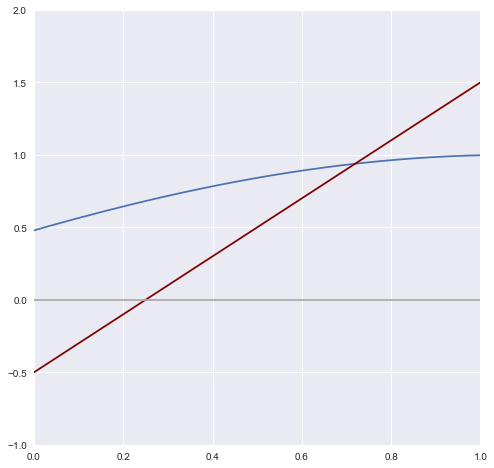

In [125]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(X, eq_left(X))
ax.plot(X, eq_right(X), c='maroon')
ax.plot(*DEFAULT_PARAMS)

ax.set_xlim([A, B])
ax.set_ylim([-1, 2])

plt.show()

## Fixed-point iteration
### $\phi(x) = \frac{1}{2}(sin(x + \frac{1}{2}) + \frac{1}{2}$

In [130]:
def fixed_point_iter(f, x0, tol, maxiter=100):
    """Return the root of function using fixed-point
    iteration method and number of iterations 
    to achieve given accuracy
    """  
    x = f(x0)
    for i in range(maxiter):
        if np.abs(x-x0) < tol:
            return i, x
        x0 = x
        x = f(x)
    return maxiter, x

def phi_p(x):
    """Right side of the canonical form of p(x): 
    x = φ(x)
    """
    return 0.5 * (np.sin(0.5+x)+0.5)

In [131]:
print_results(fixed_point_iter, phi_p, 0.7)

ε = 0.0001; x = 0.71943855581893; iterations = 3
ε = 1e-05; x = 0.7194556440721782; iterations = 5
ε = 1e-06; x = 0.719456075795343; iterations = 6


# Function q(x)
### $x^3 + 3x + 1 = 0$

In [132]:
def left_poly(x):
    return x**3 + 3*x + 1

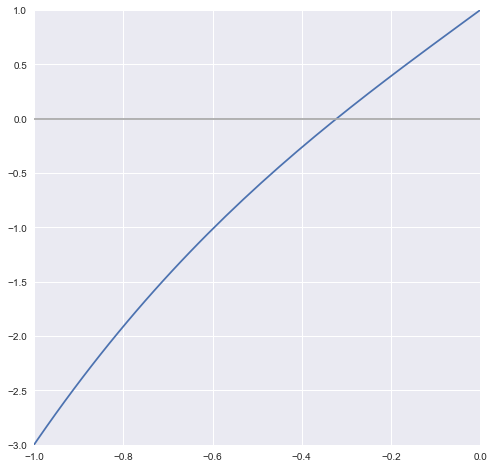

In [133]:
figure, ax = plt.subplots(figsize=(8, 8))

ax.plot(X, left_poly(X))
ax.plot(*DEFAULT_PARAMS)

ax.set_xlim(-1, 0)
ax.set_ylim(-3, 1)

plt.show()

## Fixed-point iteration
### $\phi(x) = -\frac{x^3 + 1}{3}$

In [134]:
def phi_q(x):
    """Right side of one of the canonical forms of q(x): 
    x = φ(x)
    """
    return -(x**3 + 1) / 3

In [135]:
print_results(fixed_point_iter, phi_q, -0.3)

ε = 0.0001; x = -0.3221829375756453; iterations = 3
ε = 1e-05; x = -0.32218560552226366; iterations = 4
ε = 1e-06; x = -0.3221853285821883; iterations = 5
